In [22]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))

In [23]:
import matplotlib.pyplot as plt

In [24]:
from src.domains import rectangle_domain
from src.boundary import build_boundary, affine_boundary
from src.runningcost import zero_cost
from src.problem import make_problem
from src.solver import solve_equation
from src.viz import plot_u, plot_residual, write_video, plot_delta_residual_sweep, plot_alpha, plot_u_alpha_diff
from src.experiments import sweep_deltas, run_random_policies

## __most basic setup__

In [25]:
# problem setup
nx = ny = 50
mask = rectangle_domain(nx, ny)
g = build_boundary(nx, ny, mask, affine_boundary)
f = zero_cost(nx, ny)

problem = make_problem(nx, ny, mask=mask, g=g, f=f, h=1.0)

#### __jacobi__

In [26]:
uJ, policyJ, histJ, snapsJ, itersJ = solve_equation(problem, method="jacobi", tol=1e-6, save_snapshots=True, snapshot_freq=20)

Converged in 3758 iterations.


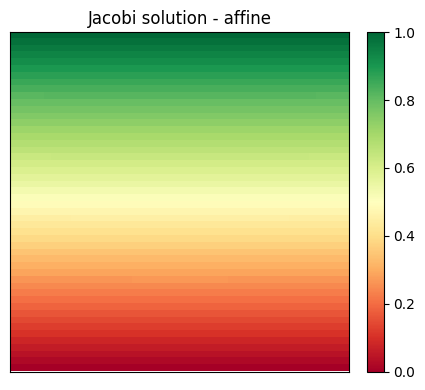

In [27]:
plot_u(uJ, "Jacobi solution - affine")

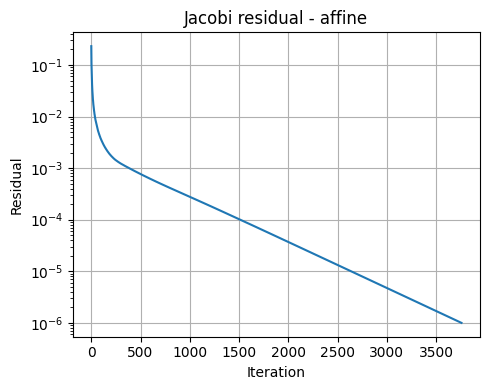

In [28]:
plot_residual(histJ, "Jacobi residual - affine")

In [29]:
movie_path = PROJECT_ROOT / "movies" / "jacobi_basic.mp4"
write_video(snapsJ, itersJ, filename=movie_path, fps=10)

#### __jacobi w/ contraction__

In [30]:
delta = 0.95
uJC, policyJC, histJC, snapsJC, itersJC = solve_equation(problem, method="jacobi", delta=delta, tol=1e-6, save_snapshots=True, snapshot_freq=20)

Converged in 210 iterations.


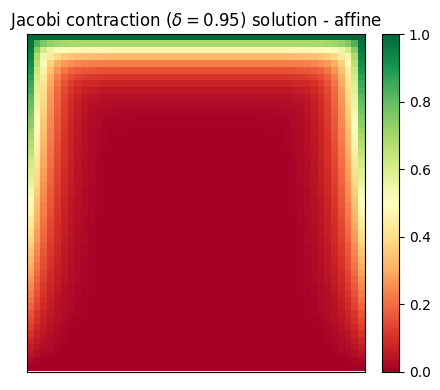

In [31]:
plot_u(uJC, fr"Jacobi contraction ($\delta = {delta}$) solution - affine")

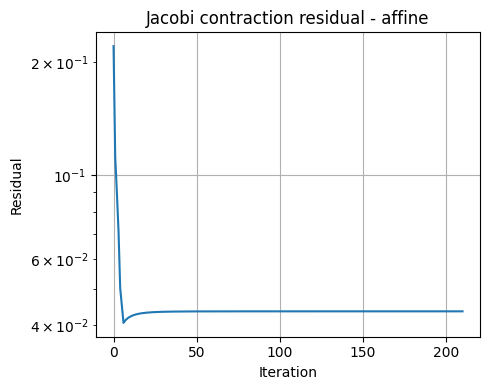

In [32]:
plot_residual(histJC, "Jacobi contraction residual - affine")

In [33]:
movie_path = PROJECT_ROOT / "movies" / "jc_basic.mp4"
write_video(snapsJC, itersJC, filename=movie_path, fps=10)

#### __loop over deltas__

Converged in 3758 iterations.
Converged in 2701 iterations.
Converged in 1305 iterations.
Converged in 808 iterations.
Converged in 467 iterations.
Converged in 210 iterations.


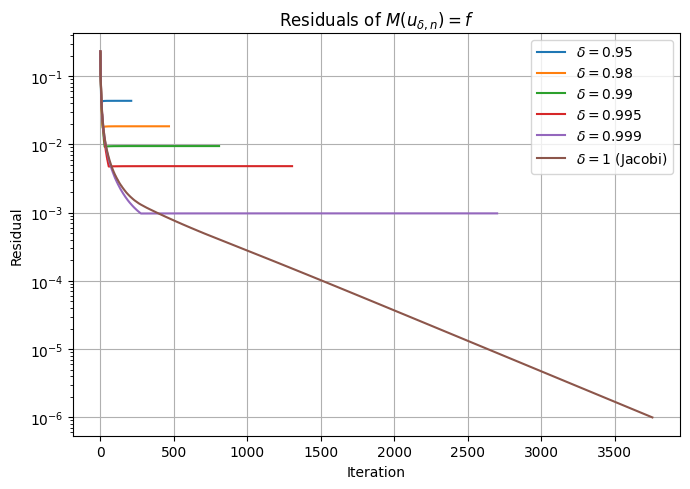

In [34]:
deltas = [1.0, 0.999, 0.995, 0.99, 0.98, 0.95]

results = sweep_deltas(
    problem,
    deltas=deltas,
    method="jacobi"
)

plot_delta_residual_sweep(results)

#### __gauss-seidel__

In [35]:
uGS, policyGS, histGS, snapsGS, itersGS = solve_equation(problem, method="gs", tol=1e-6, save_snapshots=True, snapshot_freq=20)

Converged in 2058 iterations.


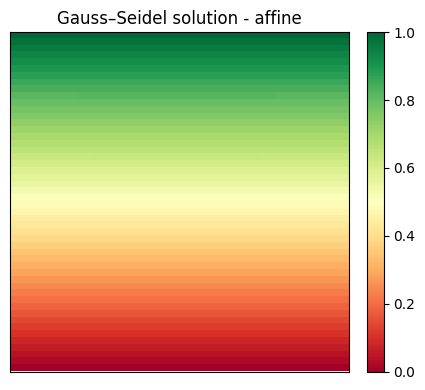

In [36]:
plot_u(uGS, "Gauss–Seidel solution - affine")

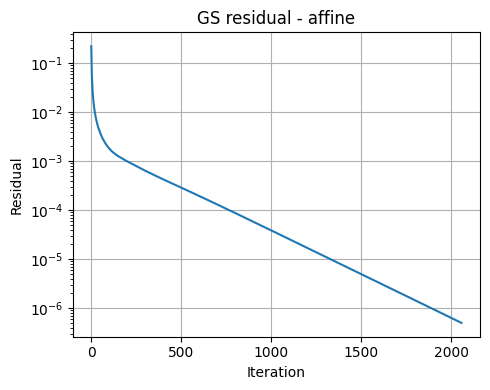

In [37]:
plot_residual(histGS, "GS residual - affine")

In [38]:
movie_path = PROJECT_ROOT / "movies" / "gs_basic.mp4"
write_video(snapsGS, itersGS, filename=movie_path, fps=10)

#### __random strategy__

In [39]:
out = run_random_policies(problem, uGS, n=1, seed=0, method="gs")

In [40]:
alpha = out["alphas"][0]
u_alpha = out["solutions"][0]

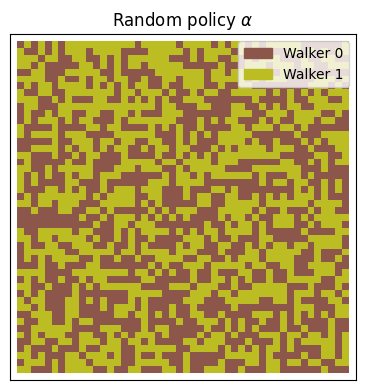

In [41]:
plot_alpha(alpha, mask)

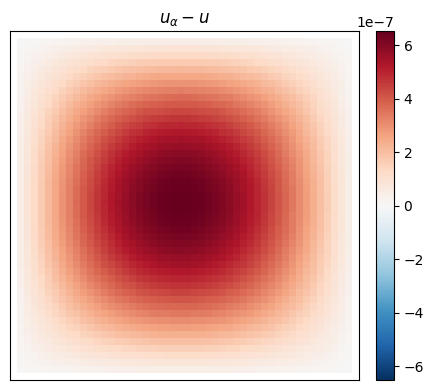

In [42]:
plot_u_alpha_diff(u_alpha, uGS, mask)